Cloning into 'waymo-od'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 174 (delta 17), reused 35 (delta 12), pack-reused 124
Receiving objects: 100% (174/174), 14.00 MiB | 38.94 MiB/s, done.
Resolving deltas: 100% (45/45), done.
* master
  remotes/origin/HEAD -> origin/master
  remotes/origin/master
  remotes/origin/r1.0


In [8]:
!cd waymo-od && git checkout remotes/origin/r1.0

Note: checking out 'remotes/origin/r1.0'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 2f30db6 Merge branch 'master' into r1.0


In [9]:
!sudo apt install build-essential
!sudo apt-get install --assume-yes pkg-config zip g++ zlib1g-dev unzip python3 python3-pip
!wget https://github.com/bazelbuild/bazel/releases/download/0.28.0/bazel-0.28.0-installer-linux-x86_64.sh
!sudo bash ./bazel-0.28.0-installer-linux-x86_64.sh

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
unzip is already the newest version (6.0-21ubuntu1).
zip is already the newest version (3.0-11build1).
zlib1g-dev is already the newest version (1:1.2.11.dfsg-0ubuntu2).
zlib1g-dev set to manually installed.
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
python3 is already the newest version (3.6.7-1~18.04).
The following additional packages will be installed:
  python-pip-whl python3-asn1crypto python3-cffi-backend python3-crypto
  python3-cryptography python3-idna python3-keyring python3-keyrings.alt
  python3-pkg-resources python3-secretstorage python3-setuptools python3-si

In [10]:
!cd waymo-od && ./configure.sh && cat .bazelrc && bazel clean

Using installed tensorflow
build -c opt
build --cxxopt="-std=c++11"
build --cxxopt="-D_GLIBCXX_USE_CXX11_ABI=0"
build --auto_output_filter=subpackages
build --copt="-Wall" --copt="-Wno-sign-compare"
build --incompatible_bzl_disallow_load_after_statement=false
query --incompatible_bzl_disallow_load_after_statement=false
build --action_env TF_HEADER_DIR="/usr/local/lib/python3.6/dist-packages/tensorflow/include"
build --action_env TF_SHARED_LIBRARY_DIR="/usr/local/lib/python3.6/dist-packages/tensorflow"
build --action_env TF_SHARED_LIBRARY_NAME="libtensorflow_framework.so.1"
build --action_env TF_NEED_CUDA="0"
Extracting Bazel installation...
Starting local Bazel server and connecting to it...
INFO: Starting clean (this may take a while). Consider using --async if the clean takes more than several minutes.


In [11]:
!cd waymo-od && bazel build ... --show_progress_rate_limit=10.0

Loading: 
Analyzing: 63 targets (46 packages loaded, 696 targets configured)
INFO: Analyzed 63 targets (57 packages loaded, 1748 targets configured).
INFO: Found 63 targets...
[13 / 277] 2 actions, 1 running
    @com_google_protobuf//:protoc_lib; 2s processwrapper-sandbox
[24 / 277] 2 actions, 1 running
    @com_google_protobuf//:protoc_lib; 0s processwrapper-sandbox
[35 / 277] 2 actions, 1 running
    @com_google_protobuf//:protoc_lib; 2s processwrapper-sandbox
[43 / 277] 2 actions, 1 running
    @com_google_protobuf//:protoc_lib; 1s processwrapper-sandbox
[52 / 277] 2 actions, 1 running
    @com_google_protobuf//:protoc_lib; 3s processwrapper-sandbox
[61 / 277] 2 actions, 1 running
    @com_google_protobuf//:protoc_lib; 1s processwrapper-sandbox
[71 / 277] 2 actions running
    @com_google_protobuf//:protoc_lib; 2s processwrapper-sandbox
[79 / 277] 2 actions running
    @com_google_protobuf//:protobuf; 1s processwrapper-sandbox
[88 / 277] 2 actions running
    @com_google_protobuf//:

In [12]:
!cd waymo-od && bazel-bin/waymo_open_dataset/metrics/tools/compute_detection_metrics_main waymo_open_dataset/metrics/tools/fake_predictions.bin  waymo_open_dataset/metrics/tools/fake_ground_truths.bin


OBJECT_TYPE_TYPE_VEHICLE_LEVEL_2: [mAP 0.0650757] [mAPH 0.055601]
OBJECT_TYPE_TYPE_PEDESTRIAN_LEVEL_2: [mAP 0.101786] [mAPH 0.0473937]
OBJECT_TYPE_TYPE_SIGN_LEVEL_2: [mAP 0.0500082] [mAPH 0.0366725]
OBJECT_TYPE_TYPE_CYCLIST_LEVEL_2: [mAP 0] [mAPH 0]
RANGE_TYPE_VEHICLE_[0, 30)_LEVEL_2: [mAP 0.0784186] [mAPH 0.0709105]
RANGE_TYPE_VEHICLE_[30, 50)_LEVEL_2: [mAP 0.133955] [mAPH 0.103888]
RANGE_TYPE_VEHICLE_[50, +inf)_LEVEL_2: [mAP 0.0522752] [mAPH 0.0460845]
RANGE_TYPE_PEDESTRIAN_[0, 30)_LEVEL_2: [mAP 0.0458333] [mAPH 2.20291e-09]
RANGE_TYPE_PEDESTRIAN_[30, 50)_LEVEL_2: [mAP 0.110526] [mAPH 0.0512746]
RANGE_TYPE_PEDESTRIAN_[50, +inf)_LEVEL_2: [mAP 0.15] [mAPH 0.074034]
RANGE_TYPE_SIGN_[0, 30)_LEVEL_2: [mAP 0.128993] [mAPH 0.100171]
RANGE_TYPE_SIGN_[30, 50)_LEVEL_2: [mAP 0.0354839] [mAPH 0.0171309]
RANGE_TYPE_SIGN_[50, +inf)_LEVEL_2: [mAP 0.0164904] [mAPH 0.01548]
RANGE_TYPE_CYCLIST_[0, 30)_LEVEL_2: [mAP 0] [mAPH 0]
RANGE_TYPE_CYCLIST_[30, 50)_LEVEL_2: [mAP 0] [mAPH 0]
RANGE_TYPE_CYCLIST_[

In [13]:
!pip3 install numpy tensorflow

In [14]:
!cd waymo-od && ./configure.sh && cat .bazelrc

Using installed tensorflow
build -c opt
build --cxxopt="-std=c++11"
build --cxxopt="-D_GLIBCXX_USE_CXX11_ABI=0"
build --auto_output_filter=subpackages
build --copt="-Wall" --copt="-Wno-sign-compare"
build --incompatible_bzl_disallow_load_after_statement=false
query --incompatible_bzl_disallow_load_after_statement=false
build --action_env TF_HEADER_DIR="/usr/local/lib/python3.6/dist-packages/tensorflow/include"
build --action_env TF_SHARED_LIBRARY_DIR="/usr/local/lib/python3.6/dist-packages/tensorflow"
build --action_env TF_SHARED_LIBRARY_NAME="libtensorflow_framework.so.1"
build --action_env TF_NEED_CUDA="0"


In [15]:
!cd waymo-od && bazel test waymo_open_dataset/metrics/ops/... && bazel test waymo_open_dataset/metrics/python/...

Loading: 
Loading: 0 packages loaded
Analyzing: 4 targets (0 packages loaded, 0 targets configured)
Analyzing: 4 targets (0 packages loaded, 0 targets configured)
INFO: Analyzed 4 targets (0 packages loaded, 0 targets configured).
Building: checking cached actions
INFO: Found 3 targets and 1 test target...
Building: checking cached actions
[0 / 1] [Prepa] BazelWorkspaceStatusAction stable-status.txt
INFO: Elapsed time: 4.858s, Critical Path: 4.48s
INFO: 1 process: 1 processwrapper-sandbox.
INFO: Build completed successfully, 2 total actions
//waymo_open_dataset/metrics/ops:detection_metrics_ops_test              PASSED in 4.4s

Executed 1 out of 1 test: 1 test passes.
INFO: Build completed successfully, 2 total actions
Loading: 0 packages loaded
INFO: Analyzed 3 targets (0 packages loaded, 0 targets configured).
INFO: Found 2 targets and 1 test target...
[1 / 2] 1 / 1 tests;  1 action; last test: .../python:detection_metrics_test
INFO: Elapsed time: 10.086s, Critical Path: 9.70s
INFO: 

In [16]:
!cd waymo-od && bazel test waymo_open_dataset/metrics/ops/... && bazel test waymo_open_dataset/metrics/python/...

Loading: 
Loading: 0 packages loaded
Analyzing: 4 targets (0 packages loaded, 0 targets configured)
Analyzing: 4 targets (0 packages loaded, 0 targets configured)
INFO: Analyzed 4 targets (0 packages loaded, 0 targets configured).
Building: checking cached actions
INFO: Found 3 targets and 1 test target...
Building: checking cached actions
[0 / 1] [Prepa] BazelWorkspaceStatusAction stable-status.txt
INFO: Elapsed time: 0.253s, Critical Path: 0.00s
[2 / 2] 1 / 1 tests; checking cached actions; last test: ...n_metrics_ops_test
INFO: 0 processes.
[2 / 2] 1 / 1 tests; checking cached actions; last test: ...n_metrics_ops_test
INFO: Build completed successfully, 1 total action
//waymo_open_dataset/metrics/ops:detection_metrics_ops_test     (cached) PASSED in 4.4s

Executed 0 out of 1 test: 1 test passes.
There were tests whose specified size is too big. Use the --test_verbose_timeout_warnings command line option to see which ones these are.
INFO: Build completed successfully, 1 total action


In [17]:
!cd waymo-od && bazel test waymo_open_dataset/metrics/ops/... && bazel test waymo_open_dataset/metrics/python/...

Loading: 
Loading: 0 packages loaded
Analyzing: 4 targets (0 packages loaded, 0 targets configured)
Analyzing: 4 targets (0 packages loaded, 0 targets configured)
INFO: Analyzed 4 targets (0 packages loaded, 0 targets configured).
Building: checking cached actions
INFO: Found 3 targets and 1 test target...
Building: checking cached actions
[0 / 1] [Prepa] BazelWorkspaceStatusAction stable-status.txt
INFO: Elapsed time: 0.233s, Critical Path: 0.01s
[2 / 2] 1 / 1 tests; checking cached actions; last test: ...n_metrics_ops_test
INFO: 0 processes.
[2 / 2] 1 / 1 tests; checking cached actions; last test: ...n_metrics_ops_test
INFO: Build completed successfully, 1 total action
//waymo_open_dataset/metrics/ops:detection_metrics_ops_test     (cached) PASSED in 4.4s

Executed 0 out of 1 test: 1 test passes.
There were tests whose specified size is too big. Use the --test_verbose_timeout_warnings command line option to see which ones these are.
INFO: Build completed successfully, 1 total action


In [18]:
!cd waymo-od && bazel test waymo_open_dataset/metrics/ops/... && bazel test waymo_open_dataset/metrics/python/...

Loading: 
Loading: 0 packages loaded
Analyzing: 4 targets (0 packages loaded, 0 targets configured)
Analyzing: 4 targets (0 packages loaded, 0 targets configured)
INFO: Analyzed 4 targets (0 packages loaded, 0 targets configured).
Building: checking cached actions
INFO: Found 3 targets and 1 test target...
Building: checking cached actions
[0 / 2] [Prepa] BazelWorkspaceStatusAction stable-status.txt
INFO: Elapsed time: 0.213s, Critical Path: 0.01s
[2 / 2] 1 / 1 tests; checking cached actions; last test: ...n_metrics_ops_test
INFO: 0 processes.
[2 / 2] 1 / 1 tests; checking cached actions; last test: ...n_metrics_ops_test
INFO: Build completed successfully, 1 total action
//waymo_open_dataset/metrics/ops:detection_metrics_ops_test     (cached) PASSED in 4.4s

Executed 0 out of 1 test: 1 test passes.
There were tests whose specified size is too big. Use the --test_verbose_timeout_warnings command line option to see which ones these are.
INFO: Build completed successfully, 1 total action


In [19]:
!cd waymo-od && bazel test ...

Loading: 
Loading: 0 packages loaded
Analyzing: 63 targets (0 packages loaded, 0 targets configured)
Analyzing: 63 targets (0 packages loaded, 0 targets configured)
INFO: Analyzed 63 targets (0 packages loaded, 0 targets configured).
Building: checking cached actions
INFO: Found 45 targets and 18 test targets...
Building: checking cached actions
[0 / 1] [Prepa] BazelWorkspaceStatusAction stable-status.txt
[6 / 8] 5 / 18 tests; 2 actions running; last test: ...rics:metrics_utils_test
    Testing //.../metrics:tracking_metrics_test; 0s processwrapper-sandbox
    Testing //.../utils:transform_utils_test; 0s processwrapper-sandbox
[7 / 9] 6 / 18 tests; 2 actions running; last test: ...s:tracking_metrics_test
    Testing //.../utils:transform_utils_test; 0s processwrapper-sandbox
[8 / 10] 7 / 18 tests; 2 actions running; last test: .../metrics:iou_test
    Testing //.../utils:transform_utils_test; 0s processwrapper-sandbox
[8 / 10] 7 / 18 tests; 2 actions running; last test: .../metrics:iou

In [0]:
!cp /content/waymo-od/bazel-genfiles/waymo_open_dataset/label_pb2.py /content/waymo-od/waymo_open_dataset/label_pb2.py
!cp /content/waymo-od/bazel-genfiles/waymo_open_dataset/dataset_pb2.py /content/waymo-od/waymo_open_dataset/dataset_pb2.py

In [22]:
import os
import imp
import tensorflow as tf
import math
import numpy as np
import itertools

os.environ['PYTHONPATH']='/env/python:/content/waymo-od'
m=imp.find_module('waymo_open_dataset', ['/content/waymo-od'])
imp.load_module('waymo_open_dataset', m[0], m[1], m[2])

from waymo_open_dataset.utils import range_image_utils
from waymo_open_dataset.utils import transform_utils
from waymo_open_dataset import dataset_pb2 as open_dataset

tf.enable_eager_execution()

W0825 14:06:47.871911 140274263934848 deprecation_wrapper.py:119] From /content/waymo-od/waymo_open_dataset/utils/range_image_utils.py:59: The name tf.unsorted_segment_max is deprecated. Please use tf.math.unsorted_segment_max instead.

W0825 14:06:47.873195 140274263934848 deprecation_wrapper.py:119] From /content/waymo-od/waymo_open_dataset/utils/range_image_utils.py:226: The name tf.unsorted_segment_min is deprecated. Please use tf.math.unsorted_segment_min instead.



In [0]:
FILENAME = '/content/waymo-od/tutorial/frames'
dataset = tf.data.TFRecordDataset(FILENAME, compression_type='')
for data in dataset:
    frame = open_dataset.Frame()
    frame.ParseFromString(bytearray(data.numpy()))
    break

In [0]:
def parse_range_image_and_camera_projection(frame):
  """Parse range images and camera projections given a frame.

  Args:
     frame: open dataset frame proto
  Returns:
     range_images: A dict of {laser_name,
       [range_image_first_return, range_image_second_return]}.
     camera_projections: A dict of {laser_name,
       [camera_projection_from_first_return,
        camera_projection_from_second_return]}.
    range_image_top_pose: range image pixel pose for top lidar.
  """
  range_images = {}
  camera_projections = {}
  range_image_top_pose = None
  for laser in frame.lasers:
    if len(laser.ri_return1.range_image_compressed) > 0:
      range_image_str_tensor = tf.decode_compressed(
          laser.ri_return1.range_image_compressed, 'ZLIB')
      ri = open_dataset.MatrixFloat()
      ri.ParseFromString(bytearray(range_image_str_tensor.numpy()))
      range_images[laser.name] = [ri]

      if laser.name == open_dataset.LaserName.TOP:
        range_image_top_pose_str_tensor = tf.decode_compressed(
            laser.ri_return1.range_image_pose_compressed, 'ZLIB')
        range_image_top_pose = open_dataset.MatrixFloat()
        range_image_top_pose.ParseFromString(
            bytearray(range_image_top_pose_str_tensor.numpy()))

      camera_projection_str_tensor = tf.decode_compressed(
          laser.ri_return1.camera_projection_compressed, 'ZLIB')
      cp = open_dataset.MatrixInt32()
      cp.ParseFromString(bytearray(camera_projection_str_tensor.numpy()))
      camera_projections[laser.name] = [cp]
    if len(laser.ri_return2.range_image_compressed) > 0:
      range_image_str_tensor = tf.decode_compressed(
          laser.ri_return2.range_image_compressed, 'ZLIB')
      ri = open_dataset.MatrixFloat()
      ri.ParseFromString(bytearray(range_image_str_tensor.numpy()))
      range_images[laser.name].append(ri)

      camera_projection_str_tensor = tf.decode_compressed(
          laser.ri_return2.camera_projection_compressed, 'ZLIB')
      cp = open_dataset.MatrixInt32()
      cp.ParseFromString(bytearray(camera_projection_str_tensor.numpy()))
      camera_projections[laser.name].append(cp)
  return range_images, camera_projections, range_image_top_pose 
(range_images, camera_projections,
 range_image_top_pose) = parse_range_image_and_camera_projection(frame)

In [26]:
print(frame.context)

name: "11004685739714500220_2300_000_2320_000"
camera_calibrations {
  name: FRONT
  intrinsic: 2055.556149361639
  intrinsic: 2055.556149361639
  intrinsic: 939.6574698861468
  intrinsic: 641.0721821943271
  intrinsic: 0.03231600849798887
  intrinsic: -0.3214124825527059
  intrinsic: 0.0007932583953709973
  intrinsic: -0.0006257493541333847
  intrinsic: 0.0
  extrinsic {
    transform: 0.9998926849887427
    transform: -0.005993208400016058
    transform: 0.0133678704017097
    transform: 1.5389142447125008
    transform: 0.006042236521329663
    transform: 0.9999751560547995
    transform: -0.003630241176497072
    transform: -0.02363394083934774
    transform: -0.013345781499156929
    transform: 0.003710623431877962
    transform: 0.999904056092345
    transform: 2.115270572975561
    transform: 0.0
    transform: 0.0
    transform: 0.0
    transform: 1.0
  }
  width: 1920
  height: 1280
  rolling_shutter_direction: LEFT_TO_RIGHT
}
camera_calibrations {
  name: FRONT_LEFT
  intrins

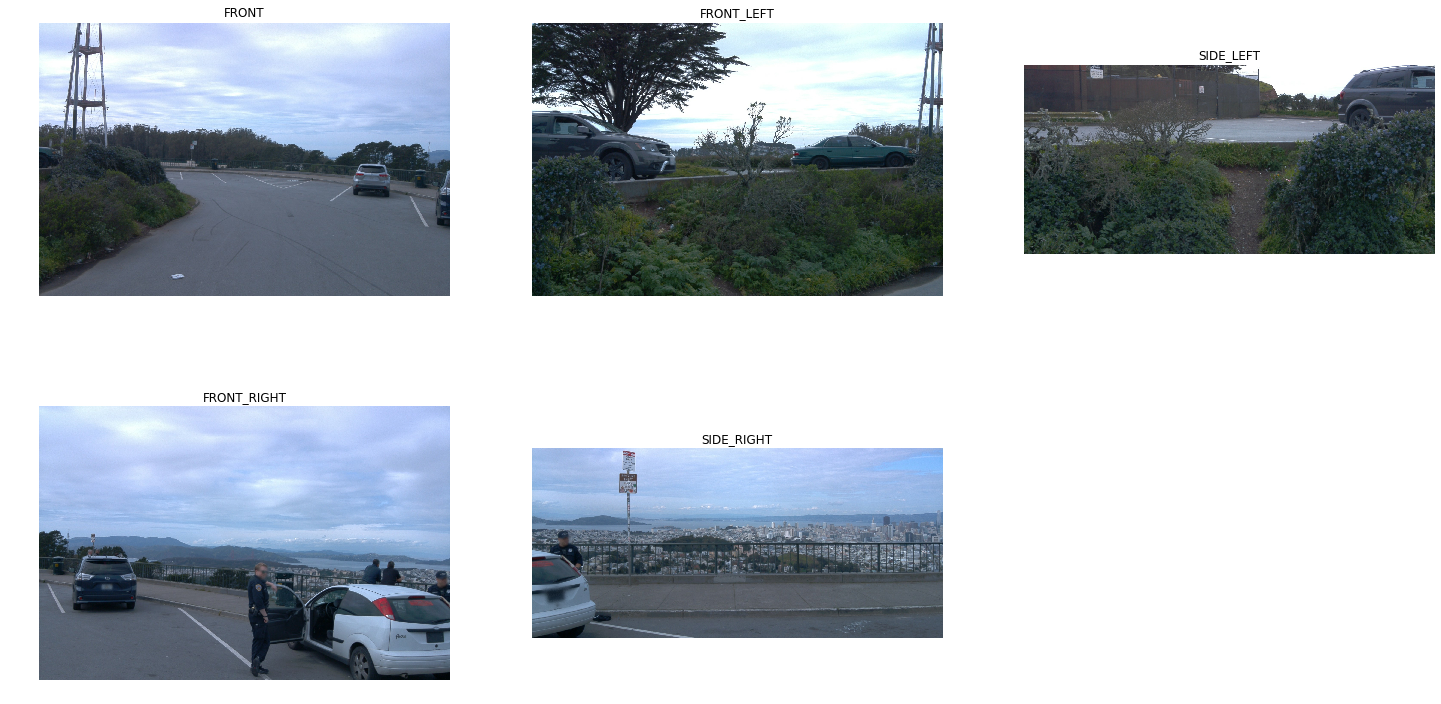

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 20))

def image_show(data, name, layout, cmap=None):
  """Show an image."""
  plt.subplot(*layout)
  plt.imshow(tf.image.decode_jpeg(data), cmap=cmap)
  plt.title(name)
  plt.grid(False)
  plt.axis('off')

for index, image in enumerate(frame.images):
  image_show(image.image, open_dataset.CameraName.Name.Name(image.name),
             [3, 3, index+1])

W0825 14:15:42.656901 140274263934848 deprecation.py:323] From <ipython-input-28-b8306174e61d>:34: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


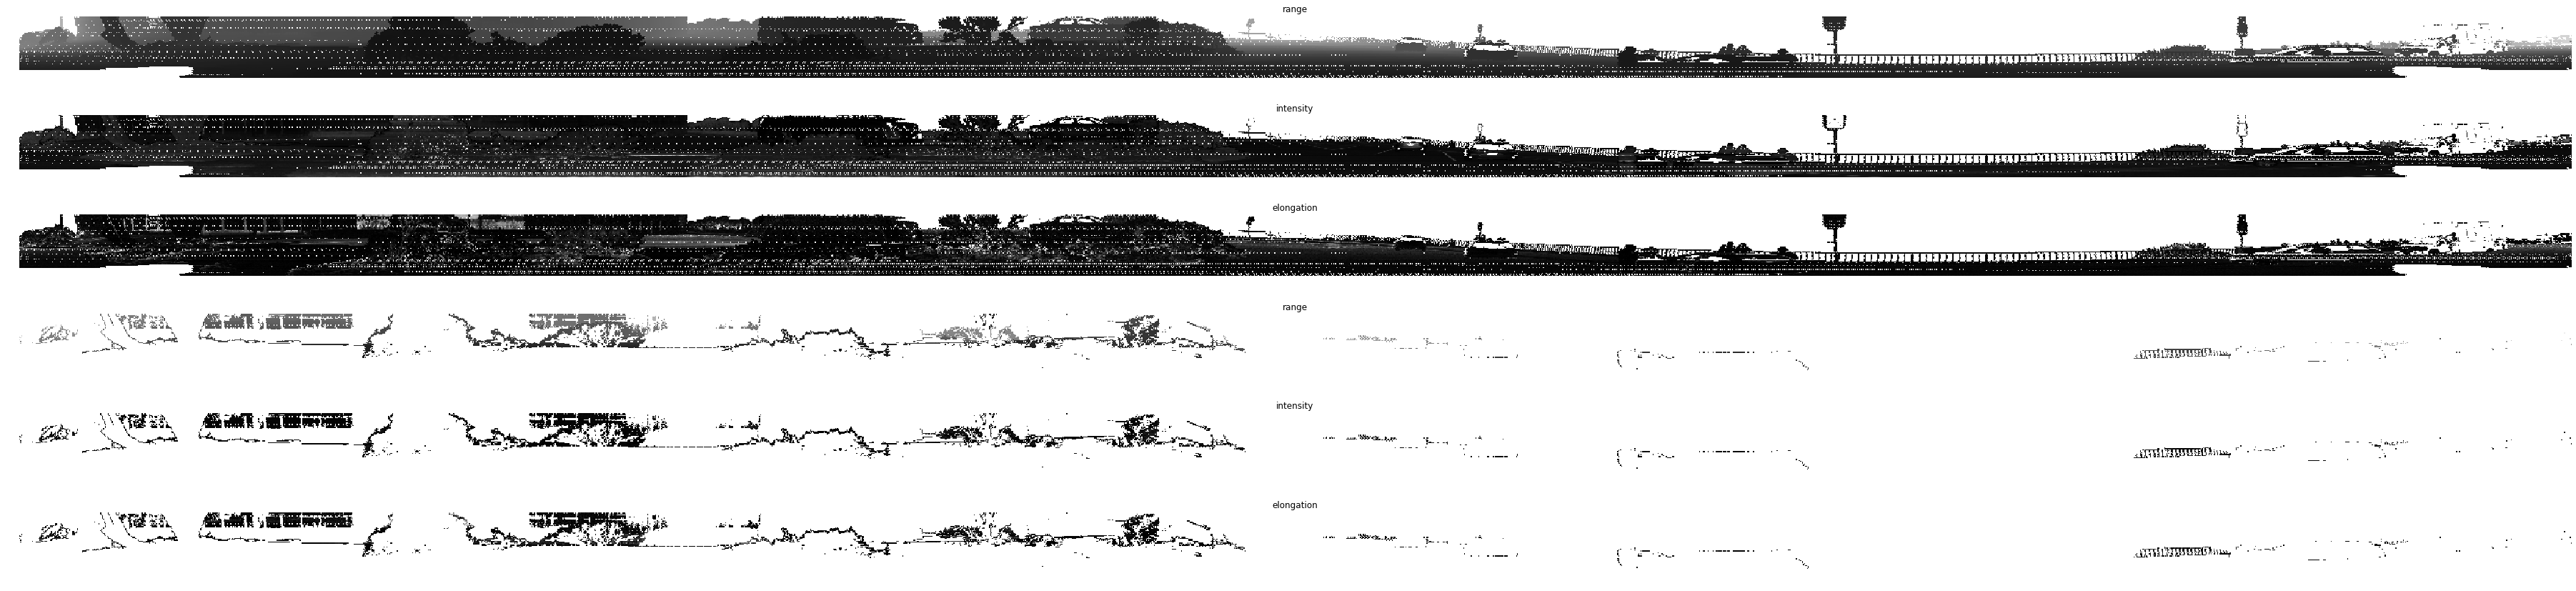

In [28]:
plt.figure(figsize=(64, 20))
def plot_range_image_helper(data, name, layout, vmin = 0, vmax=1, cmap='gray'):
  """Plots range image.

  Args:
    data: range image data
    name: the image title
    layout: plt layout
    vmin: minimum value of the passed data
    vmax: maximum value of the passed data
    cmap: color map
  """
  plt.subplot(*layout)
  plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
  plt.title(name)
  plt.grid(False)
  plt.axis('off')

def get_range_image(laser_name, return_index):
  """Returns range image given a laser name and its return index."""
  return range_images[laser_name][return_index]

def show_range_image(range_image, layout_index_start = 1):
  """Shows range image.

  Args:
    range_image: the range image data from a given lidar of type MatrixFloat.
    layout_index_start: layout offset
  """
  range_image_tensor = tf.convert_to_tensor(range_image.data)
  range_image_tensor = tf.reshape(range_image_tensor, range_image.shape.dims)
  lidar_image_mask = tf.greater_equal(range_image_tensor, 0)
  range_image_tensor = tf.where(lidar_image_mask, range_image_tensor,
                                tf.ones_like(range_image_tensor) * 1e10)
  range_image_range = range_image_tensor[...,0] 
  range_image_intensity = range_image_tensor[...,1]
  range_image_elongation = range_image_tensor[...,2]
  plot_range_image_helper(range_image_range.numpy(), 'range',
                   [8, 1, layout_index_start], vmax=75, cmap='gray')
  plot_range_image_helper(range_image_intensity.numpy(), 'intensity',
                   [8, 1, layout_index_start + 1], vmax=1.5, cmap='gray')
  plot_range_image_helper(range_image_elongation.numpy(), 'elongation',
                   [8, 1, layout_index_start + 2], vmax=1.5, cmap='gray')
frame.lasers.sort(key=lambda laser: laser.name)
show_range_image(get_range_image(open_dataset.LaserName.TOP, 0), 1)
show_range_image(get_range_image(open_dataset.LaserName.TOP, 1), 4)

In [29]:
def convert_range_image_to_point_cloud(frame,
                                       range_images,
                                       camera_projections,
                                       range_image_top_pose,
                                       ri_index = 0):
  """Convert range images to point cloud.

  Args:
    frame: open dataset frame
     range_images: A dict of {laser_name,
       [range_image_first_return, range_image_second_return]}.
     camera_projections: A dict of {laser_name,
       [camera_projection_from_first_return,
        camera_projection_from_second_return]}.
    range_image_top_pose: range image pixel pose for top lidar.
    ri_index: 0 for the first return, 1 for the second return.
  Returns:
    points: {[N, 3]} list of 3d lidar points of length 5 (number of lidars).
    cp_points: {[N, 6]} list of camera projections of length 5
      (number of lidars).
  """
  calibrations = sorted(frame.context.laser_calibrations, key=lambda c: c.name)
  lasers = sorted(frame.lasers, key=lambda laser: laser.name)
  points = [] 
  cp_points = []
  
  frame_pose = tf.convert_to_tensor(
      np.reshape(np.array(frame.pose.transform), [4, 4]))
  # [H, W, 6]
  range_image_top_pose_tensor = tf.reshape(
      tf.convert_to_tensor(range_image_top_pose.data),
      range_image_top_pose.shape.dims)
  # [H, W, 3, 3]
  range_image_top_pose_tensor_rotation = transform_utils.get_rotation_matrix(
      range_image_top_pose_tensor[..., 0], range_image_top_pose_tensor[..., 1],
      range_image_top_pose_tensor[..., 2])
  range_image_top_pose_tensor_translation = range_image_top_pose_tensor[..., 3:]
  range_image_top_pose_tensor = transform_utils.get_transform(
      range_image_top_pose_tensor_rotation,
      range_image_top_pose_tensor_translation)
  for c in calibrations:
    range_image = range_images[c.name][ri_index]
    if len(c.beam_inclinations) == 0:
      beam_inclinations = range_image_utils.compute_inclination(
          tf.constant([c.beam_inclination_min, c.beam_inclination_max]),
          height=range_image.shape.dims[0])
    else:
      beam_inclinations = tf.constant(c.beam_inclinations)

    beam_inclinations = tf.reverse(beam_inclinations, axis=[-1])
    extrinsic = np.reshape(np.array(c.extrinsic.transform), [4, 4])

    range_image_tensor = tf.reshape(
        tf.convert_to_tensor(range_image.data), range_image.shape.dims)
    pixel_pose_local = None
    frame_pose_local = None
    if c.name == open_dataset.LaserName.TOP:
      pixel_pose_local = range_image_top_pose_tensor
      pixel_pose_local = tf.expand_dims(pixel_pose_local, axis=0)
      frame_pose_local = tf.expand_dims(frame_pose, axis=0)
    range_image_mask = range_image_tensor[..., 0] > 0
    range_image_cartesian = range_image_utils.extract_point_cloud_from_range_image(
        tf.expand_dims(range_image_tensor[..., 0], axis=0),
        tf.expand_dims(extrinsic, axis=0),
        tf.expand_dims(tf.convert_to_tensor(beam_inclinations), axis=0),
        pixel_pose=pixel_pose_local,
        frame_pose=frame_pose_local)

    range_image_cartesian = tf.squeeze(range_image_cartesian, axis=0)
    points_tensor = tf.gather_nd(range_image_cartesian,
                                 tf.where(range_image_mask))

    cp = camera_projections[c.name][0]
    cp_tensor = tf.reshape(tf.convert_to_tensor(cp.data), cp.shape.dims)
    cp_points_tensor = tf.gather_nd(cp_tensor, tf.where(range_image_mask))
    points.append(points_tensor.numpy())
    cp_points.append(cp_points_tensor.numpy())

  return points, cp_points

points, cp_points = convert_range_image_to_point_cloud(frame,
                                                       range_images,
                                                       camera_projections,
                                                       range_image_top_pose)
points_ri2, cp_points_ri2 = convert_range_image_to_point_cloud(
    frame,
    range_images,
    camera_projections,
    range_image_top_pose,
    ri_index=1)

# 3d points in vehicle frame.
points_all = np.concatenate(points, axis=0)
points_all_ri2 = np.concatenate(points_ri2, axis=0)
# camera projection corresponding to each point.
cp_points_all = np.concatenate(cp_points, axis=0)
cp_points_all_ri2 = np.concatenate(cp_points_ri2, axis=0)

W0825 14:16:20.688649 140274263934848 deprecation_wrapper.py:119] From /content/waymo-od/waymo_open_dataset/utils/range_image_utils.py:207: The name tf.matrix_inverse is deprecated. Please use tf.linalg.inv instead.



In [30]:
print(points_all.shape)
print(cp_points_all.shape)
print(points_all[0:2])
for i in range(5):
  print(points[i].shape)
  print(cp_points[i].shape)

(126805, 3)
(126805, 6)
[[-51.139       5.1010137   4.3288565]
 [-51.3299      5.2447767   4.336956 ]]
(108996, 3)
(108996, 6)
(4041, 3)
(4041, 6)
(5184, 3)
(5184, 6)
(4108, 3)
(4108, 6)
(4476, 3)
(4476, 6)


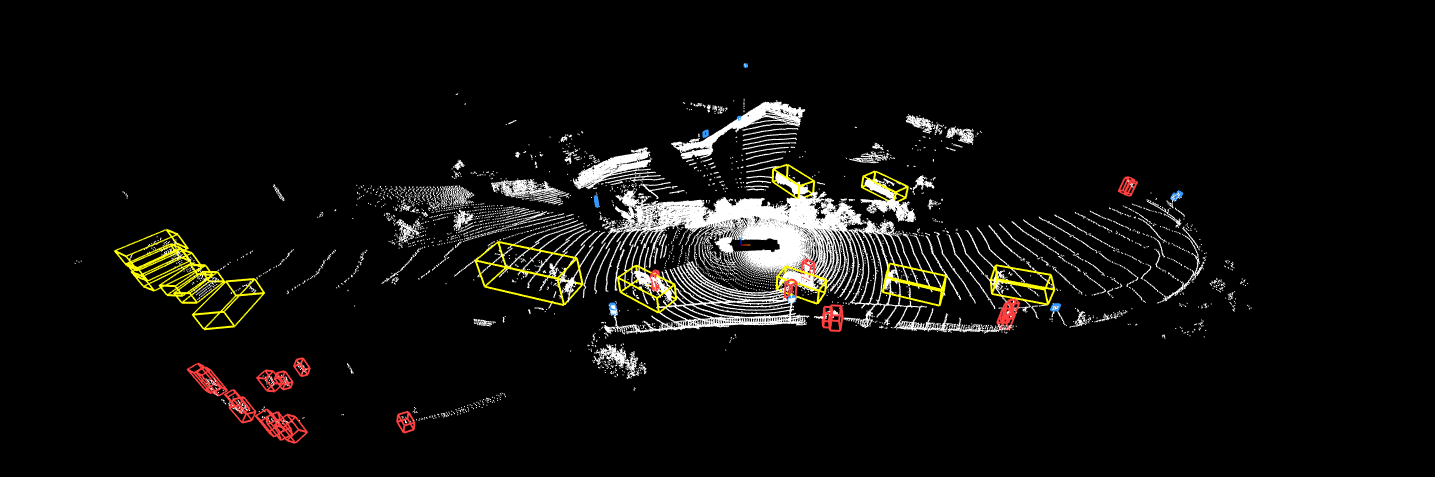

In [31]:
from IPython.display import Image, display
display(Image('/content/waymo-od/tutorial/3d_point_cloud.png'))

In [0]:
images = sorted(frame.images, key=lambda i:i.name)
cp_points_all_concat = np.concatenate([cp_points_all, points_all], axis=-1)
cp_points_all_concat_tensor = tf.constant(cp_points_all_concat)

# The distance between lidar points and vehicle frame origin.
points_all_tensor = tf.norm(points_all, axis=-1, keepdims=True)
cp_points_all_tensor = tf.constant(cp_points_all, dtype=tf.int32)

mask = tf.equal(cp_points_all_tensor[..., 0], images[0].name)

cp_points_all_tensor = tf.cast(tf.gather_nd(
    cp_points_all_tensor, tf.where(mask)), dtype=tf.float32)
points_all_tensor = tf.gather_nd(points_all_tensor, tf.where(mask))

projected_points_all_from_raw_data = tf.concat(
    [cp_points_all_tensor[..., 1:3], points_all_tensor], axis=-1).numpy()

In [0]:
def rgba(r):
  """Generates a color based on range.

  Args:
    r: the range value of a given point.
  Returns:
    The color for a given range
  """
  c = plt.get_cmap('jet')((r % 20.0) / 20.0)
  c = list(c)
  c[-1] = 0.5  # alpha
  return c

def plot_image(camera_image):
  """Plot a cmaera image."""
  plt.figure(figsize=(20, 12))
  plt.imshow(tf.image.decode_jpeg(camera_image.image))
  plt.grid("off")

def plot_points_on_image(projected_points, camera_image, rgba_func,
                         point_size=5.0):
  """Plots points on a camera image.

  Args:
    projected_points: [N, 3] numpy array. The inner dims are
      [camera_x, camera_y, range].
    camera_image: jpeg encoded camera image.
    rgba_func: a function that generates a color from a range value.
    point_size: the point size.

  """
  plot_image(camera_image)

  xs = []
  ys = []
  colors = []

  for point in projected_points:
    xs.append(point[0])  # width, col
    ys.append(point[1])  # height, row
    colors.append(rgba_func(point[2]))

  plt.scatter(xs, ys, c=colors, s=point_size, edgecolors="none")

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


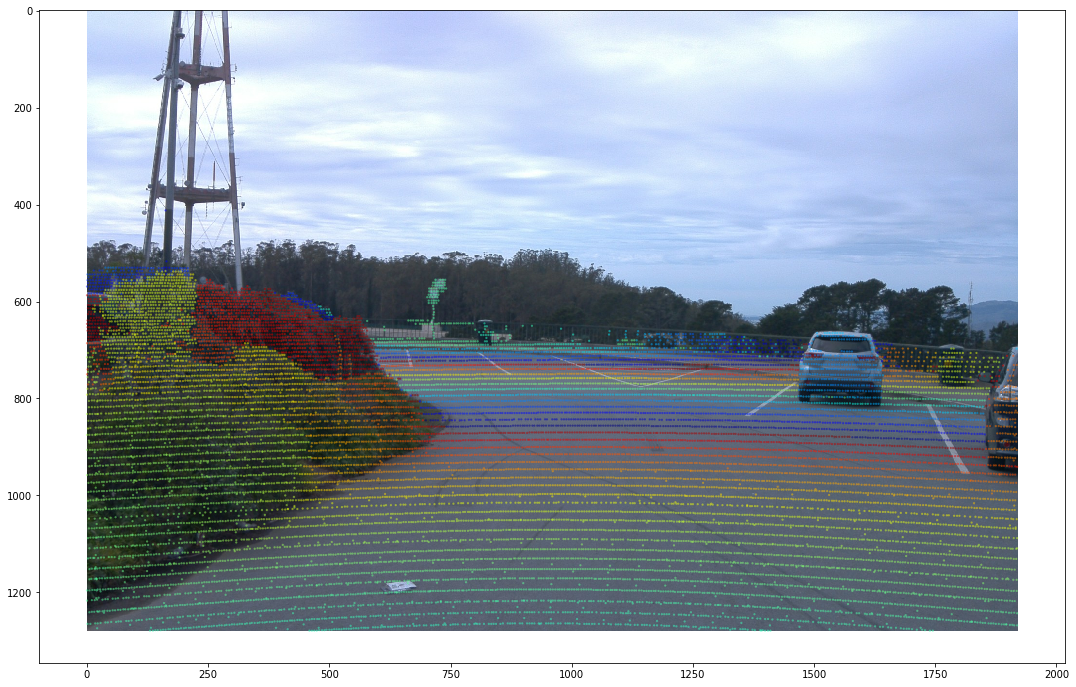

In [34]:
plot_points_on_image(projected_points_all_from_raw_data,
                     images[0], rgba, point_size=5.0)